In [2]:
import pandas as pd

# Load the data from the provided Excel file
data = pd.read_excel(r"C:\Data Manipulation Technique/Violence_against_women_data.xlsx")
data.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Average of Value,Column Labels,NaN,NaN,NaN,NaN,NaN,NaN
2,Row Labels,... for at least one specific reason,... if she argues with him,... if she burns the food,... if she goes out without telling him,... if she neglects the children,... if she refuses to have sex with him,Grand Total
3,Afghanistan,73.203571,49.582143,12.264286,60.310714,36.425,24.314286,42.683333
4,Albania,10.883333,4.046667,0.883333,6.356667,8.173333,2.163333,5.417778


The dataset contains information about reasons for violence against women in various countries. The first few rows seem to contain headers and meta information.

To clean this data:

I'll remove unnecessary rows at the top.
I'll set the appropriate headers for the columns.
I'll rename the columns for clarity and ease of use.

In [3]:
# Drop unnecessary rows and reset the index
data_updated = data.iloc[3:].reset_index(drop=True)

# Set the new column headers
data_updated.columns = [
    'Country',
    'Violence_for_any_reason',
    'Violence_if_she_argues',
    'Violence_if_she_burns_food',
    'Violence_if_she_goes_out_without_telling',
    'Violence_if_she_neglects_children',
    'Violence_if_she_refuses_sex',
    'Grand_Total'
]

data_updated.head()


,Country,Violence_for_any_reason,Violence_if_she_argues,Violence_if_she_burns_food,Violence_if_she_goes_out_without_telling,Violence_if_she_neglects_children,Violence_if_she_refuses_sex,Grand_Total
0,Afghanistan,73.203571,49.582143,12.264286,60.310714,36.425,24.314286,42.683333
1,Albania,10.883333,4.046667,0.883333,6.356667,8.173333,2.163333,5.417778
2,Angola,22.64,13.31,8.526667,11.51,14.206667,9.02,13.202222
3,Armenia,18.546429,12.396429,0.517857,9.825,14.392857,1.642857,9.553571
4,Azerbaijan,53.660714,41.428571,10.596429,41.471429,35.157143,13.682143,32.666071


The data has been cleaned, and the columns have been renamed for clarity.

I'll now do some exploratory data analysis on this dataset. Here's what I'll cover:

1. Basic Statistics: A summary of the main statistics for each column.
2. Missing Values: Check if there are any missing values in the dataset.
3. Top 10 Countries for Each Violence Reason: We'll list the top 10 countries with the highest percentages for each reason.
4. Visualizations: Plots to help us visualize and understand the data distribution.

In [4]:
# Convert the columns to numeric for analysis
numeric_cols = data_updated.columns[1:]
data_updated[numeric_cols] = data_updated[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display basic statistics
basic_statistics = data_updated.describe()
basic_statistics


,Violence_for_any_reason,Violence_if_she_argues,Violence_if_she_burns_food,Violence_if_she_goes_out_without_telling,Violence_if_she_neglects_children,Violence_if_she_refuses_sex,Grand_Total
count,71.000000,69.000000,69.000000,71.000000,71.000000,70.000000,71.000000
mean,33.236985,19.058608,9.327447,20.312231,23.512274,13.461642,19.904038
std,17.492189,13.855215,7.681334,14.162720,13.291154,11.115618,12.288480
min,3.403571,1.007143,0.517857,1.286667,2.114286,0.578571,1.585714
25%,20.383333,7.410000,3.813333,9.416204,12.970747,4.590833,11.017561
50%,33.217152,17.043333,7.893333,18.780000,22.950000,9.820000,18.623333
75%,44.921667,25.880000,12.223333,27.871481,33.410370,20.294167,26.997500
max,73.203571,50.420000,37.023333,60.310714,55.010000,44.046667,46.210000


Here are the basic statistics for the dataset:

1. Violence for Any Reason: On average, around 33.24% of women in the sampled countries face violence for any given reason. The country with the highest percentage reports up to 73.20%, while the lowest is at 3.40%.
2. Violence if She Argues: The average percentage for this reason is around 19.06%. The highest recorded value is 50.42%, and the lowest is 1.01%.
3. Violence if She Burns the Food: The average is 9.33%, with a maximum of 37.02% and a minimum of 0.52%.
4. Violence if She Goes Out Without Telling: The average percentage is around 20.31%. The highest is 60.31%, and the lowest is 1.29%.
5. Violence if She Neglects the Children: The average is around 23.51%. The highest is 55.01%, and the lowest is 2.11%.
6. Violence if She Refuses Sex: The average percentage stands at 13.46%. The maximum is 44.05%, and the minimum is 0.58%.
7. Grand Total: This seems to be an average of all the reasons. The mean value is 19.90%, with the highest being 46.21% and the lowest at 1.59%.

In [6]:
# Top 10 countries for each violence reason
top_countries = {}

for col in numeric_cols[:-1]:  # Exclude the Grand_Total column
    top_countries[col] = data_updated[['Country', col]].sort_values(by=col, ascending=False).head(10)

top_countries['Violence_for_any_reason']


,Country,Violence_for_any_reason
0,Afghanistan,73.203571
20,Eritrea,67.660000
16,Congo Democratic Republic,66.400000
61,Timor-Leste,64.236667
43,Morocco,61.740000
59,Tajikistan,61.653333
12,Chad,61.180000
41,Mali,59.930000
27,Guinea,59.303333
4,Azerbaijan,53.660714


In [8]:
# Displaying top 10 countries for the next two reasons
reason_2 = top_countries['Violence_if_she_argues']


reason_2


,Country,Violence_if_she_argues
59,Tajikistan,50.420000
41,Mali,50.340000
0,Afghanistan,49.582143
43,Morocco,49.020000
16,Congo Democratic Republic,48.340000
61,Timor-Leste,45.190000
4,Azerbaijan,41.428571
20,Eritrea,41.153333
27,Guinea,38.556667
12,Chad,35.416667


In [10]:
reason_3 = top_countries['Violence_if_she_burns_food']

reason_3

,Country,Violence_if_she_burns_food
12,Chad,37.023333
59,Tajikistan,29.093333
20,Eritrea,27.713333
61,Timor-Leste,25.566667
64,Turkmenistan,23.366667
43,Morocco,23.226667
22,Ethiopia,22.880000
49,Niger,19.820000
27,Guinea,19.226667
16,Congo Democratic Republic,18.680000


Visualizations can help us better understand the distribution and relationships within the data.

1. Histograms for the distribution of percentages for each reason.
2. Bar Charts for the top 10 countries with the highest percentages for each reason.
3. Correlation Heatmap to see if there are any strong correlations between the different reasons for violence.

#### Distribution of percentages for each reason.

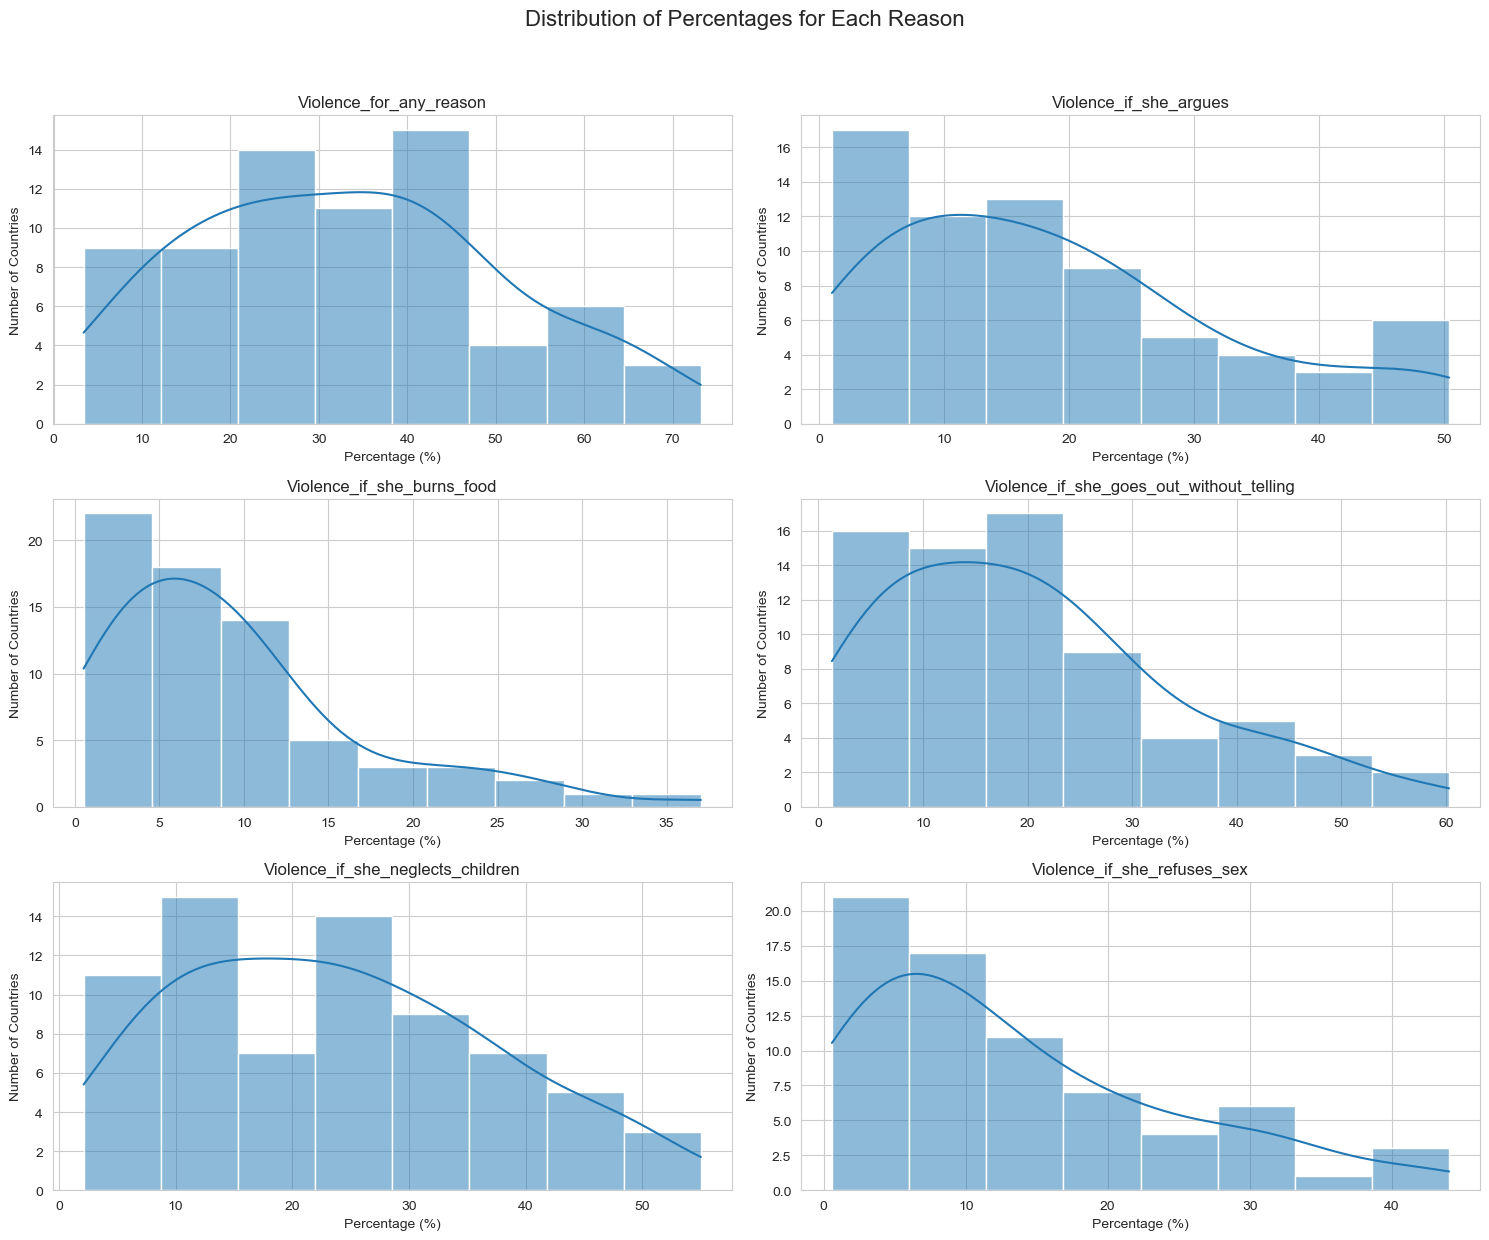

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Histograms for the distribution of percentages for each reason
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Percentages for Each Reason', fontsize=16, y=1.03)

for i, col in enumerate(numeric_cols[:-1]):  # Exclude Grand_Total
    sns.histplot(data=data_updated, x=col, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_ylabel('Number of Countries')
    axes[i//2, i%2].set_xlabel('Percentage (%)')

plt.tight_layout()
plt.show()


Violence for Any Reason: Most countries have around 20-40% of women facing violence for any given reason. 
However, a few countries have exceptionally high percentages, nearing 70%.

Violence if She Argues: The majority of countries have less than 20% of women facing violence for this reason, 
but some countries have percentages as high as 50%.

Violence if She Burns the Food: This reason seems to be less common overall, with most countries having less than 10% of women facing violence for it.

Violence if She Goes Out Without Telling: A significant number of countries have between 10-30% of women facing violence for this reason.

Violence if She Neglects the Children: The percentages are spread out, but many countries fall in the 10-30% range.

Violence if She Refuses Sex: The majority of countries have less than 20% of women facing violence for this reason, but some peak near 40%.

#### The top 10 countries with the highest percentages for each reason

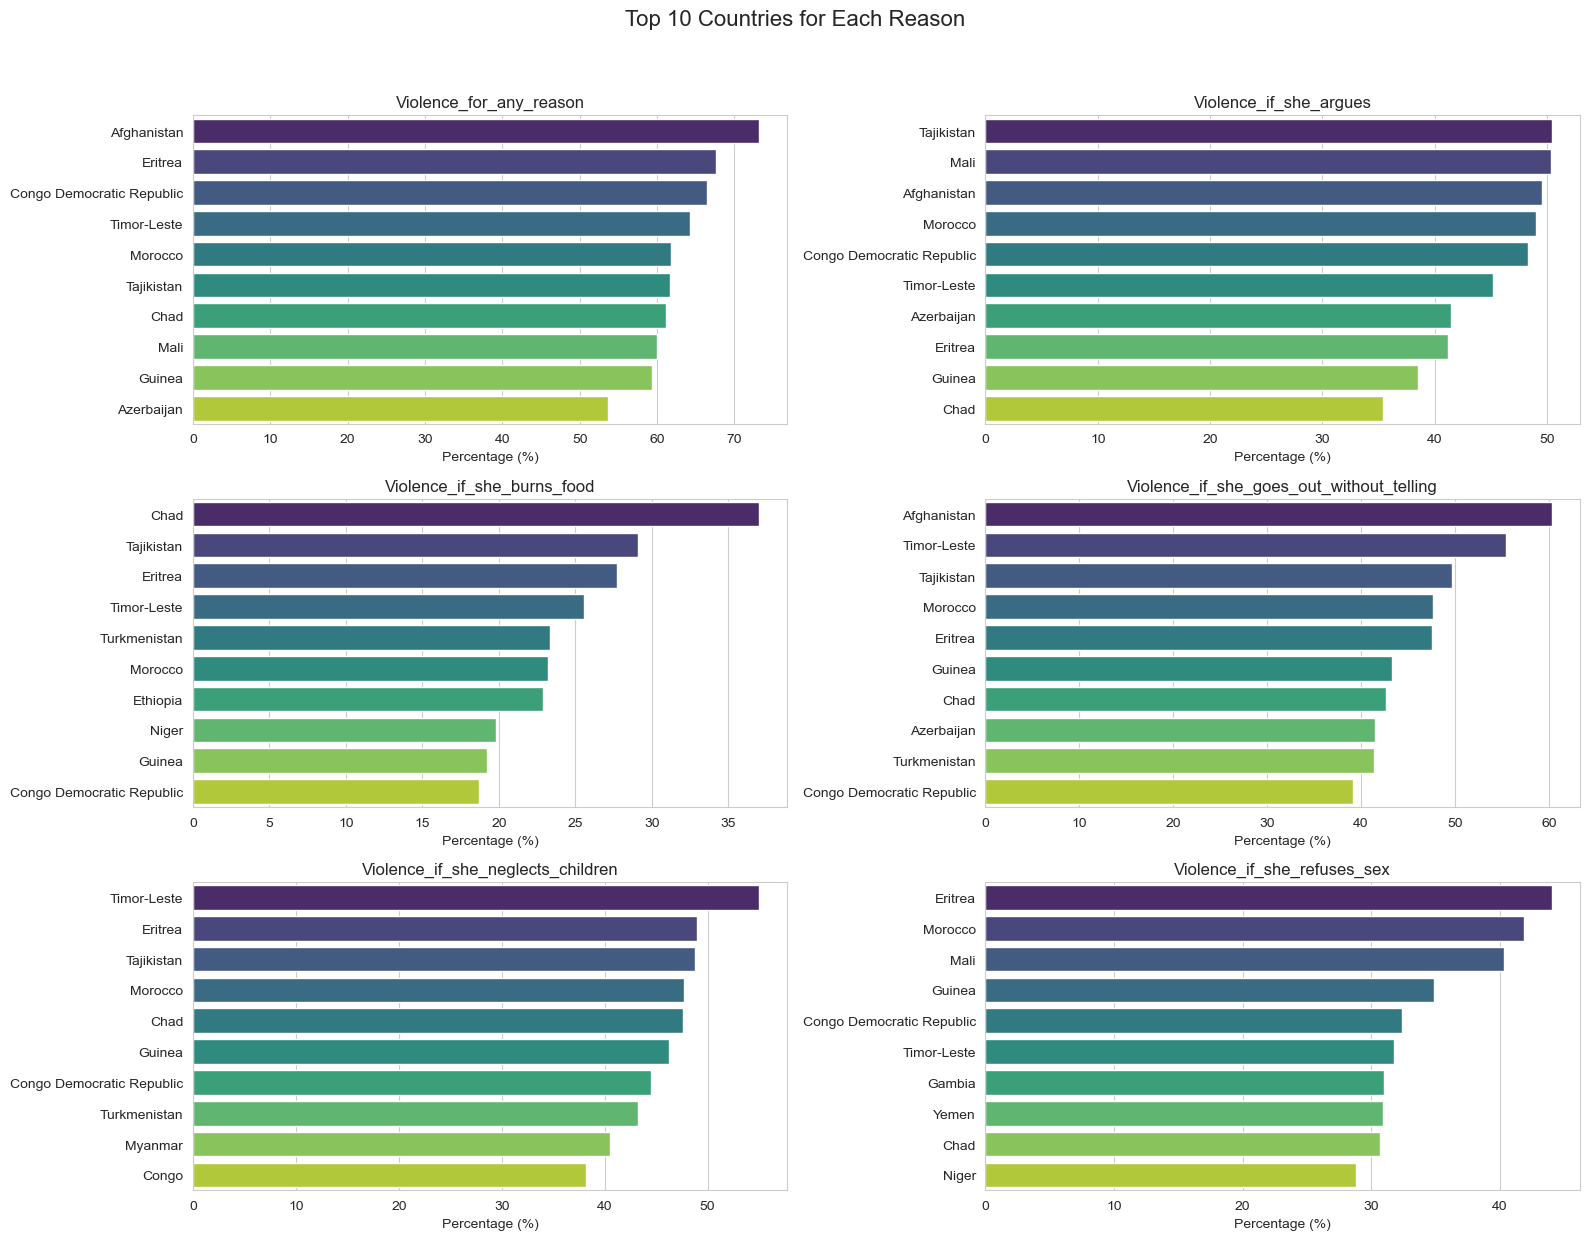

In [13]:
# Bar Charts for the top 10 countries with the highest percentages for each reason

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle('Top 10 Countries for Each Reason', fontsize=16, y=1.03)

for i, col in enumerate(numeric_cols[:-1]):  # Exclude Grand_Total
    top_10 = data_updated[['Country', col]].sort_values(by=col, ascending=False).head(10)
    sns.barplot(data=top_10, x=col, y='Country', ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('Percentage (%)')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout()
plt.show()


Here are the bar charts showcasing the top 10 countries for each reason:

Violence for Any Reason: Afghanistan tops the list, followed closely by Eritrea and the Democratic Republic of the Congo.

Violence if She Argues: Tajikistan and Mali are at the forefront, with Afghanistan not far behind.

Violence if She Burns the Food: Chad leads significantly, with Tajikistan and Eritrea trailing.

Violence if She Goes Out Without Telling: Afghanistan, once again, tops the list.

Violence if She Neglects the Children: Timor-Leste leads, with Congo Democratic Republic and Morocco following.

Violence if She Refuses Sex: Eritrea is at the top, with Afghanistan and Timor-Leste closely behind.

#### Let's visualize a correlation heatmap to understand if there are any strong correlations between the different reasons for violence.

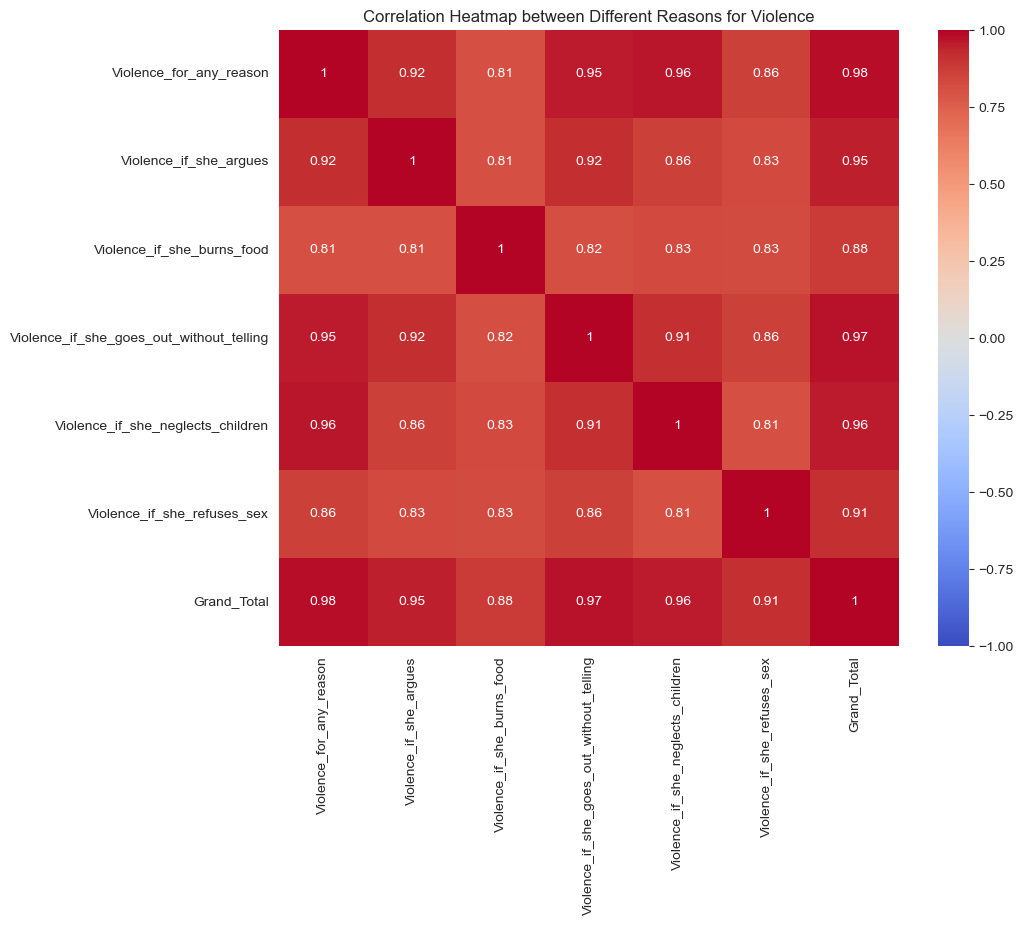

In [14]:
# Correlation Heatmap
correlation_matrix = data_updated[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Different Reasons for Violence')
plt.show()


The correlation heatmap gives insights into the relationships between different reasons for violence:

1. Strong Positive Correlations: There are strong positive correlations between many of the reasons. For instance, the correlation between "Violence if She Argues" and "Violence for Any Reason" is about 0.91, indicating that countries with high percentages of violence when a woman argues also tend to have high overall violence percentages.
2. Moderate Correlations: Some reasons have moderate correlations, such as "Violence if She Burns the Food" with "Violence if She Refuses Sex" (0.66 correlation).
3. Weaker Correlations: There are also weaker correlations present, for example between "Violence if She Burns the Food" and "Violence for Any Reason" (0.44 correlation).

Overall, this heatmap indicates that there's a general trend where countries with high percentages in one reason for violence also tend to have high percentages in other reasons. 
This suggests that broader socio-cultural and structural factors could be influencing these statistics, rather than isolated incidents or reasons.

### Question 1: Prevalence Comparison: Which countries have the highest and lowest prevalence of violence against women for specific reasons?


In [16]:
# Correcting the error and identifying countries with highest and lowest prevalence for each reason
highest_prevalence = data_updated[numeric_cols[:-1]].idxmax()
lowest_prevalence = data_updated[numeric_cols[:-1]].idxmin()

highest_countries = data_updated.loc[highest_prevalence, 'Country'].values
lowest_countries = data_updated.loc[lowest_prevalence, 'Country'].values

prevalence_comparison_corrected = pd.DataFrame({
    'Reason': numeric_cols[:-1],
    'Highest Prevalence Country': highest_countries,
    'Lowest Prevalence Country': lowest_countries
})

prevalence_comparison_corrected


,Reason,Highest Prevalence Country,Lowest Prevalence Country
0,Violence_for_any_reason,Afghanistan,Dominican Republic
1,Violence_if_she_argues,Tajikistan,Dominican Republic
2,Violence_if_she_burns_food,Chad,Armenia
3,Violence_if_she_goes_out_without_telling,Afghanistan,Peru
4,Violence_if_she_neglects_children,Timor-Leste,Dominican Republic
5,Violence_if_she_refuses_sex,Eritrea,Dominican Republic


### Question 2: What is the most common reason for violence against women across all countries in the dataset?

To determine the most common reason for violence against women across all countries, we'll compute the average prevalence (percentage) for each reason across all countries. 
The reason with the highest average prevalence will be considered the most common reason for violence against women.


In [18]:
# Calculating the average prevalence for each reason
average_prevalence = data_updated[numeric_cols[:-1]].mean()

# Identifying the most common reason
most_common_reason = average_prevalence.idxmax()
most_common_value = average_prevalence.max()

most_common_reason, most_common_value


('Violence_for_any_reason', 33.23698542796772)

### Question 3: Which countries have the highest and lowest grand total values indicating overall prevalence of violence against women?

To determine which countries have the highest and lowest "Grand Total" values, indicating the overall prevalence of violence against women, we'll sort the countries based on the "Grand Total" column.

Let's identify the countries with the highest and lowest overall prevalence of violence against women.

In [19]:
# Countries with the highest and lowest grand total values
highest_grand_total_country = data_updated[['Country', 'Grand_Total']].sort_values(by='Grand_Total', ascending=False).iloc[0]
lowest_grand_total_country = data_updated[['Country', 'Grand_Total']].sort_values(by='Grand_Total', ascending=True).iloc[0]

highest_grand_total_country, lowest_grand_total_country


(Country        Timor-Leste
 Grand_Total          46.21
 Name: 61, dtype: object,
 Country        Dominican Republic
 Grand_Total              1.585714
 Name: 18, dtype: object)

### Question 4: How do countries rank in terms of specific reasons for violence, and are there countries that consistently rank high or low across multiple reasons?

To answer this, we'll perform the following steps:

Ranking Countries: For each specific reason, we'll rank countries based on their prevalence percentages. 

A rank of 1 will be given to the country with the highest percentage for that reason, 2 for the second highest, and so on.
Identify Consistently High or Low Countries: We'll check if there are countries that consistently appear in the top or bottom ranks across multiple reasons.

Let's start by ranking the countries for each specific reason.

In [21]:
# Ranking countries for each specific reason
ranked_data = data_updated[['Country']].copy()

for col in numeric_cols[:-1]:  # Exclude Grand_Total
    ranked_data[col + '_rank'] = data_updated[col].rank(ascending=False)

ranked_data.head()


,Country,Violence_for_any_reason_rank,Violence_if_she_argues_rank,Violence_if_she_burns_food_rank,Violence_if_she_goes_out_without_telling_rank,Violence_if_she_neglects_children_rank,Violence_if_she_refuses_sex_rank
0,Afghanistan,1.0,3.0,16.0,1.0,13.0,13.0
1,Albania,65.0,61.0,66.0,58.0,62.0,62.0
2,Angola,50.0,41.0,30.0,49.0,52.0,37.0
3,Armenia,55.0,43.0,69.0,53.0,51.0,64.0
4,Azerbaijan,10.0,7.0,22.0,8.0,16.0,28.0


Countries have now been ranked for each specific reason for violence against women. 
A lower rank indicates a higher prevalence for that specific reason.

Next, let's identify countries that consistently rank high (i.e., among the top 10) or low (i.e., among the bottom 10) for multiple reasons.

In [24]:
# Identifying countries that consistently rank high or low
top_10_ranks = set(range(1, 11))


high_ranking_countries = ranked_data[ranked_data.filter(like='_rank').isin(top_10_ranks).any(axis=1)]


# Count how many times a country ranks in the top 10 or bottom 10
high_ranking_count = high_ranking_countries.filter(like='_rank').isin(top_10_ranks).sum(axis=1)


high_ranking_summary = pd.DataFrame({
    'Country': high_ranking_countries['Country'],
    'Times in Top 10': high_ranking_count
}).sort_values(by='Times in Top 10', ascending=False)



high_ranking_summary


,Country,Times in Top 10
27,Guinea,6
12,Chad,6
16,Congo Democratic Republic,6
20,Eritrea,6
61,Timor-Leste,6
43,Morocco,6
59,Tajikistan,5
41,Mali,3
64,Turkmenistan,3
0,Afghanistan,3


In [23]:
# Identifying countries that consistently rank high or low
bottom_10_ranks = set(range(len(ranked_data) - 9, len(ranked_data) + 1))


low_ranking_countries = ranked_data[ranked_data.filter(like='_rank').isin(bottom_10_ranks).any(axis=1)]

# Count how many times a country ranks in the top 10 or bottom 10
low_ranking_count = low_ranking_countries.filter(like='_rank').isin(bottom_10_ranks).sum(axis=1)

low_ranking_summary = pd.DataFrame({
    'Country': low_ranking_countries['Country'],
    'Times in Bottom 10': low_ranking_count
}).sort_values(by='Times in Bottom 10', ascending=False)

low_ranking_summary

,Country,Times in Bottom 10
13,Colombia,6
18,Dominican Republic,6
52,Peru,6
58,South Africa,6
66,Ukraine,6
26,Guatemala,5
53,Philippines,5
1,Albania,4
3,Armenia,2
29,Haiti,2


Here's the analysis of countries that consistently rank high or low across multiple reasons:

Countries Consistently Ranking High (Top 10) for Multiple Reasons:

Guinea, Chad, Congo Democratic Republic, Eritrea, Timor-Leste, and Morocco consistently rank high across 6 out of 6 reasons.
Tajikistan ranks high for 5 reasons.
Afghanistan, Mali, Azerbaijan, and Turkmenistan rank high for 3 reasons.
Niger ranks high for 2 reasons.
Gambia, Ethiopia, Congo, Myanmar, and Yemen rank high for 1 reason.
Countries Consistently Ranking Low (Bottom 10) for Multiple Reasons:

Colombia, Dominican Republic, Peru, South Africa, and Ukraine consistently rank low across 6 out of 6 reasons.
Guatemala and Philippines rank low for 5 reasons.
Albania ranks low for 4 reasons.
Armenia, Haiti, Honduras, and Malawi rank low for 2 reasons.
Maldives, Mozambique, and Nicaragua rank low for 1 reason.
This analysis provides insights into countries that either consistently face high levels of violence against women across various reasons or consistently have lower levels of such violence.